#1.Business Problem

In [2]:
import pandas as pd
df=pd.read_csv("Fraud_check.csv")

In [4]:
df.sample(3)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
107,NO,Married,46629,52424,6,YES
236,YES,Married,46070,193193,3,NO
256,YES,Married,70298,168568,14,NO


In [6]:
df.shape

(600, 6)

In [10]:
df['Taxable.Income'][df['Taxable.Income'] <=30000] =True

In [12]:
set(df['Marital.Status'])

{'Divorced', 'Married', 'Single'}

In [14]:
set(df['Undergrad'])

{'NO', 'YES'}

In [16]:
set(df['Urban'])

{'NO', 'YES'}

In [18]:
df.sample(4)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
480,NO,Divorced,85972,72252,26,YES
390,YES,Single,64437,57324,17,NO
118,NO,Divorced,True,199174,10,NO
343,YES,Divorced,30495,161143,17,NO


In [20]:
df['Taxable.Income'][df['Taxable.Income'] >30000] =False  

C:\Users\Hp\AppData\Local\Temp\ipykernel_9628\2337065613.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Taxable.Income'][df['Taxable.Income'] >30000] =False


In [22]:
df.sample(4)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
48,NO,Married,True,35480,12,NO
579,YES,Single,False,125112,7,YES
55,YES,Single,True,89965,16,YES
341,NO,Married,False,83900,8,YES


In [24]:
import seaborn as sns 
import matplotlib.pyplot as plt 

In [25]:
df['Taxable.Income']=df['Taxable.Income'].replace(True,'Good')

In [26]:
df.sample(3)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
13,NO,Married,False,86649,16,YES
76,YES,Married,False,129164,11,NO
585,NO,Single,False,137622,2,YES


In [27]:
df['Taxable.Income']=df['Taxable.Income'].replace(False,'Bad')

In [28]:
df.sample(5)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
327,YES,Married,Good,162777,7,NO
187,NO,Single,Bad,59558,5,YES
383,YES,Married,Bad,148246,5,YES
539,YES,Divorced,Bad,57390,8,NO
98,YES,Married,Good,77053,18,YES


#Preprocessing

In [38]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    object
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(2), object(4)
memory usage: 28.3+ KB


In [42]:
df['Undergrad']=lab.fit_transform(df['Undergrad'])

In [44]:
df['Urban']=lab.fit_transform(df['Urban'])

In [46]:
df['Taxable.Income']=lab.fit_transform(df['Taxable.Income'])

In [48]:
df['Marital.Status']=lab.fit_transform(df['Marital.Status'])

<Axes: xlabel='City.Population', ylabel='Work.Experience'>

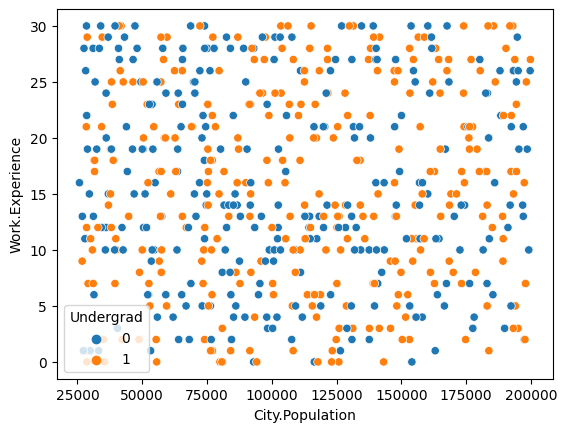

In [50]:
sns.scatterplot(df,x='City.Population',y='Work.Experience',hue='Undergrad')

In [52]:
# city population is not import in given  table  

In [54]:
df=df.drop(columns=['City.Population'])

In [56]:
df['Taxable.Income'].value_counts()

0    476
1    124
Name: Taxable.Income, dtype: int64

In [68]:
X=df.iloc[:,[0,1,3,4]]
y=df['Taxable.Income'].values

In [70]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [72]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import plot_tree 
from sklearn.ensemble import RandomForestClassifier 

In [74]:
clf1=DecisionTreeClassifier()
clf2=RandomForestClassifier()

In [76]:
clf1.fit(X_train,y_train)

DecisionTreeClassifier()

In [78]:
clf2.fit(X_train,y_train)

RandomForestClassifier()

In [80]:
from sklearn.metrics import accuracy_score 
y_pre1=clf1.predict(X_test)
y_pre2=clf2.predict(X_test)  

In [82]:
accuracy_score(y_pre1,y_test)

0.7416666666666667

In [84]:
accuracy_score(y_pre2,y_test)

0.7333333333333333

In [94]:
from sklearn.metrics import f1_score,recall_score,precision_score

In [96]:
recall_score(y_test,y_pre1)

0.11538461538461539

In [98]:
f1_score(y_test,y_pre1)

0.16216216216216217